# Exploratory Data Analysis (EDA)
## Cross-Market 30D Directional Forecasting with Vector Simulation

### Project Overview
This notebook provides comprehensive exploratory data analysis for our multi-asset trading strategy project.

**Dataset:** ~60 tickers across US/EU/Asia + commodities and ETFs  
**Target:** 30-day forward direction prediction (binary classification)  
**Features:** 43+ technical indicators + macro variables  
**Period:** 2000-2025 (25+ years of data)

### Contents:
1. Data Loading and Overview
2. Target Variable Analysis
3. Feature Distribution Analysis
4. Correlation Analysis
5. Regional/Sector Analysis
6. Time Series Patterns
7. Feature Importance Insights

In [1]:
# Imports and setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
from pathlib import Path

# Project imports
import sys
sys.path.append('../src')
from config import *

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print(f"📊 EDA Analysis for {len(ALL_TICKERS)} tickers")
print(f"📈 Target: {PREDICTION_HORIZON_DAYS}-day directional forecasting")
print(f"🔧 Features: {len(TECHNICAL_INDICATORS)} technical + {len(MACRO_INDICATORS)} macro")

📊 EDA Analysis for 67 tickers
📈 Target: 30-day directional forecasting
🔧 Features: 37 technical + 8 macro


## 1. Data Loading and Overview

In [3]:
# Load the unified dataset
data_file = PROCESSED_DATA_DIR / "dataset.parquet"
print(f"Loading data from: {data_file}")

df = pd.read_parquet(data_file)
print(f"✅ Dataset loaded: {df.shape[0]:,} rows × {df.shape[1]} columns")

# Reset index to make Date a column
df = df.reset_index()
df = df.rename(columns={'Date': 'date'})

print(f"📅 Date range: {df['date'].min()} to {df['date'].max()}")
print(f"🏢 Unique symbols: {df['symbol'].nunique()}")

# Basic info
df.info()

Loading data from: c:\Users\Gleb\work\courses\2025-05-30_stocks-analytics-course\project\notebooks\..\data\processed\dataset.parquet
✅ Dataset loaded: 381,708 rows × 61 columns
📅 Date range: 2000-01-03 00:00:00 to 2025-07-10 00:00:00
🏢 Unique symbols: 65
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381708 entries, 0 to 381707
Data columns (total 62 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   date                           381708 non-null  datetime64[ns]
 1   Open                           381708 non-null  float64       
 2   High                           381708 non-null  float64       
 3   Low                            381708 non-null  float64       
 4   Close                          381708 non-null  float64       
 5   Volume                         381708 non-null  int64         
 6   Dividends                      381708 non-null  float64       
 7   Stock Splits     

In [4]:
# Display sample rows
print("\n📋 Sample of the dataset:")
display(df.head())

print("\n📊 Basic statistics:")
display(df.describe())


📋 Sample of the dataset:


,date,Open,High,Low,Close,Volume,Dividends,Stock Splits,symbol,market,...,rsi_14_zscore,rsi_14_rank,vix,tnx10y,dxy,move,irx,gspc,ndx,rut
0,2000-01-03,564.733459,564.733459,564.733459,564.733459,0,0.0,0.0,7203.T,ASIA,...,0.0,NaN,24.209999,6.548,21.251015,120.209999,5.27,1455.219971,3790.550049,496.420013
1,2000-01-03,0.787090,0.844316,0.763168,0.840094,535796800,0.0,0.0,AAPL,US,...,0.0,NaN,24.209999,6.548,21.251015,120.209999,5.27,1455.219971,3790.550049,496.420013
2,2000-01-03,11.637696,11.637696,11.147042,11.223706,1185699,0.0,0.0,XLF,SECTOR,...,0.0,NaN,24.209999,6.548,21.251015,120.209999,5.27,1455.219971,3790.550049,496.420013
3,2000-01-03,11.925790,12.042025,11.763060,11.856049,12873345,0.0,0.0,PFE,US,...,0.0,NaN,24.209999,6.548,21.251015,120.209999,5.27,1455.219971,3790.550049,496.420013
4,2000-01-03,17.670403,17.948239,17.309215,17.406458,13458200,0.0,0.0,XOM,US,...,0.0,NaN,24.209999,6.548,21.251015,120.209999,5.27,1455.219971,3790.550049,496.420013



📊 Basic statistics:


,date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,ret_1d,...,rsi_14_zscore,rsi_14_rank,vix,tnx10y,dxy,move,irx,gspc,ndx,rut
count,381708,381708.000000,381708.000000,381708.000000,381708.000000,3.817080e+05,381708.000000,381708.000000,87235.0,381643.000000,...,381424.000000,380863.000000,381708.000000,381708.000000,381708.000000,381708.000000,381708.000000,381708.000000,381708.000000,381708.000000
mean,2013-05-21 00:51:26.522682112,604.535080,610.679220,598.227934,604.315442,3.373403e+08,0.053282,0.001269,0.0,0.000584,...,-0.000003,0.508725,19.777408,3.213388,21.810282,89.966322,1.789123,2267.924470,5878.738238,1132.869127
min,2000-01-03 00:00:00,0.055780,0.060213,0.055016,0.056316,0.000000e+00,0.000000,0.000000,0.0,-0.518692,...,-4.773833,0.015385,9.140000,0.499000,18.082088,36.619999,-0.105000,676.530029,804.640015,327.040009
25%,2007-04-30 00:00:00,18.762546,18.961800,18.569483,18.767540,4.031783e+06,0.000000,0.000000,0.0,-0.008166,...,-0.665137,0.259259,13.850000,2.169000,20.553001,64.370003,0.090000,1230.040039,1777.890015,649.150024
50%,2013-08-20 00:00:00,41.103202,41.486940,40.695542,41.098736,1.158180e+07,0.000000,0.000000,0.0,0.000498,...,0.008750,0.507937,17.690001,3.157000,21.251015,85.099998,1.073000,1683.989990,3559.949951,1016.500000
75%,2019-08-29 00:00:00,118.800003,119.892740,117.724453,118.800062,3.135862e+07,0.000000,0.000000,0.0,0.009191,...,0.686608,0.758621,23.129999,4.245000,22.449545,115.169998,3.405000,2918.649902,7781.459961,1568.469971
max,2025-07-10 00:00:00,86364.194001,87892.106319,84997.987080,85681.093750,4.476381e+11,1932.000000,100.000000,0.0,0.424147,...,5.460900,1.000000,82.690002,6.781000,29.850000,264.600006,6.220000,6280.459961,22866.970703,2442.739990
std,NaN,4371.632369,4411.907840,4329.456345,4368.540151,5.761000e+09,4.740143,0.210575,0.0,0.020544,...,0.990506,0.288651,8.447044,1.279136,2.321041,31.147583,1.917347,1363.048035,5510.706173,569.518040



🌍 Symbols by Market:
market
US           180692
ASIA          60081
EU            53700
SECTOR        32085
REGIONAL      30746
COMMODITY     24404
Name: count, dtype: int64


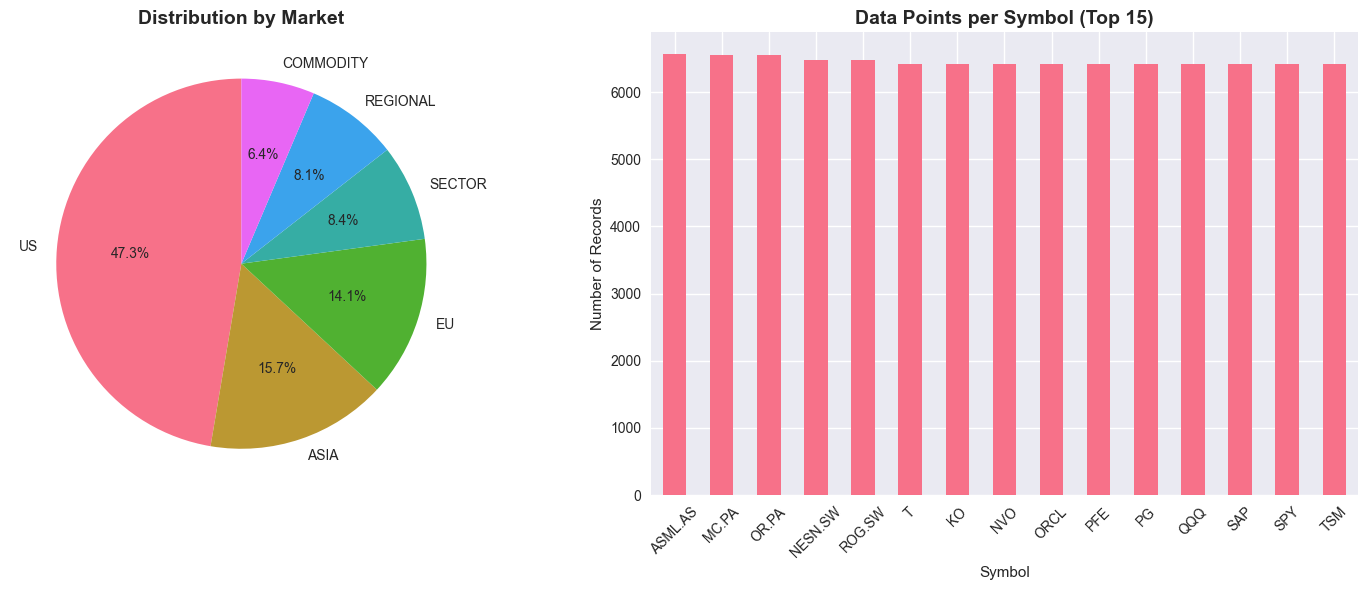

In [5]:
# Symbols by market classification
df['market'] = df['symbol'].map(get_ticker_market)
market_counts = df['market'].value_counts()

print("\n🌍 Symbols by Market:")
print(market_counts)

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Market distribution pie chart
market_counts.plot.pie(ax=ax1, autopct='%1.1f%%', startangle=90)
ax1.set_title('Distribution by Market', fontsize=14, fontweight='bold')
ax1.set_ylabel('')

# Data coverage by symbol
symbol_counts = df.groupby('symbol').size().sort_values(ascending=False)
symbol_counts.head(15).plot.bar(ax=ax2)
ax2.set_title('Data Points per Symbol (Top 15)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Symbol')
ax2.set_ylabel('Number of Records')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 2. Target Variable Analysis


🎯 Target Variable (y_30d) Analysis:
Class 0 (Down): 158,454 (41.5%)
Class 1 (Up): 223,254 (58.5%)
Class balance ratio: 1.41

📈 Continuous Returns (ret_30d):
Mean: 0.0167 (1.67%)
Std: 0.1042 (10.42%)
Median: 0.0162 (1.62%)


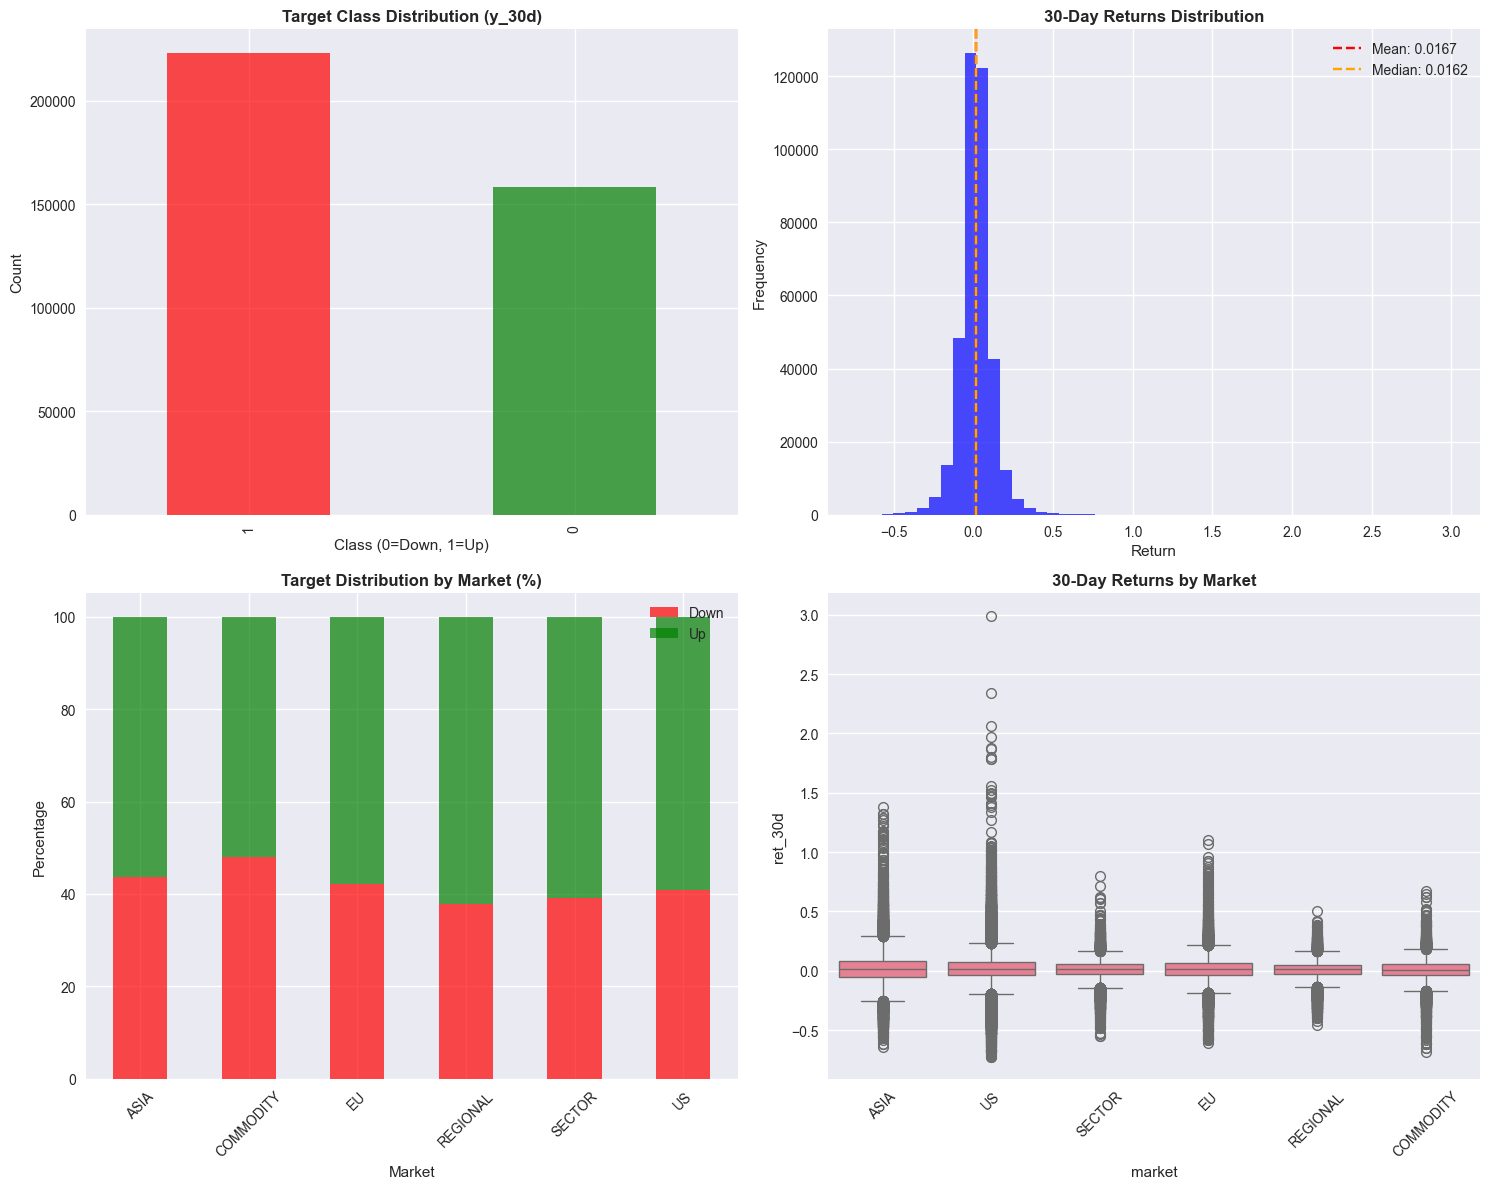

In [6]:
# Target variable distribution
target_stats = df['y_30d'].value_counts()
target_pct = df['y_30d'].value_counts(normalize=True) * 100

print("\n🎯 Target Variable (y_30d) Analysis:")
print(f"Class 0 (Down): {target_stats[0]:,} ({target_pct[0]:.1f}%)")
print(f"Class 1 (Up): {target_stats[1]:,} ({target_pct[1]:.1f}%)")
print(f"Class balance ratio: {target_pct[1]/target_pct[0]:.2f}")

# Continuous target (ret_30d) distribution
ret_stats = df['ret_30d'].describe()
print(f"\n📈 Continuous Returns (ret_30d):")
print(f"Mean: {ret_stats['mean']:.4f} ({ret_stats['mean']*100:.2f}%)")
print(f"Std: {ret_stats['std']:.4f} ({ret_stats['std']*100:.2f}%)")
print(f"Median: {ret_stats['50%']:.4f} ({ret_stats['50%']*100:.2f}%)")

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Target class distribution
target_stats.plot.bar(ax=axes[0,0], color=['red', 'green'], alpha=0.7)
axes[0,0].set_title('Target Class Distribution (y_30d)', fontweight='bold')
axes[0,0].set_xlabel('Class (0=Down, 1=Up)')
axes[0,0].set_ylabel('Count')

# Continuous returns histogram
df['ret_30d'].hist(bins=50, ax=axes[0,1], alpha=0.7, color='blue')
axes[0,1].axvline(df['ret_30d'].mean(), color='red', linestyle='--', label=f'Mean: {df["ret_30d"].mean():.4f}')
axes[0,1].axvline(df['ret_30d'].median(), color='orange', linestyle='--', label=f'Median: {df["ret_30d"].median():.4f}')
axes[0,1].set_title('30-Day Returns Distribution', fontweight='bold')
axes[0,1].set_xlabel('Return')
axes[0,1].set_ylabel('Frequency')
axes[0,1].legend()

# Target by market
market_target = pd.crosstab(df['market'], df['y_30d'], normalize='index') * 100
market_target.plot.bar(ax=axes[1,0], stacked=True, color=['red', 'green'], alpha=0.7)
axes[1,0].set_title('Target Distribution by Market (%)', fontweight='bold')
axes[1,0].set_xlabel('Market')
axes[1,0].set_ylabel('Percentage')
axes[1,0].legend(['Down', 'Up'])
axes[1,0].tick_params(axis='x', rotation=45)

# Returns by market (boxplot)
sns.boxplot(data=df, x='market', y='ret_30d', ax=axes[1,1])
axes[1,1].set_title('30-Day Returns by Market', fontweight='bold')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 3. Feature Distribution Analysis

In [7]:
# Technical indicators analysis
print("\n🔧 Technical Indicators Overview:")

# Get numeric columns (exclude date, symbol, target)
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
exclude_cols = ['y_30d', 'ret_30d']
feature_cols = [col for col in numeric_cols if col not in exclude_cols]

print(f"Total features: {len(feature_cols)}")

# Feature categories
return_features = [col for col in feature_cols if 'ret_' in col]
volatility_features = [col for col in feature_cols if 'vol_' in col]
sma_features = [col for col in feature_cols if 'sma_' in col]
price_features = [col for col in feature_cols if 'price_' in col]
macro_features = list(MACRO_INDICATORS.keys())

print(f"Return features: {len(return_features)}")
print(f"Volatility features: {len(volatility_features)}")
print(f"SMA features: {len(sma_features)}")
print(f"Price ratio features: {len(price_features)}")
print(f"Macro features: {len(macro_features)}")

# Missing values analysis
missing_data = df[feature_cols].isnull().sum().sort_values(ascending=False)
missing_pct = (missing_data / len(df) * 100).round(2)

print("\n❌ Missing Values (Top 10):")
missing_summary = pd.DataFrame({
    'Missing Count': missing_data.head(10),
    'Missing %': missing_pct.head(10)
})
print(missing_summary)


🔧 Technical Indicators Overview:
Total features: 57
Return features: 6
Volatility features: 6
SMA features: 6
Price ratio features: 3
Macro features: 8

❌ Missing Values (Top 10):
                Missing Count  Missing %
Capital Gains          294473      77.15
dist_low_252d           16315       4.27
dist_high_252d          16315       4.27
price_sma200            12935       3.39
sma_200                 12935       3.39
price_sma50              3185       0.83
sma_50                   3185       0.83
vol_30d                  1950       0.51
ret_20d                  1300       0.34
ret_20d_rank             1300       0.34


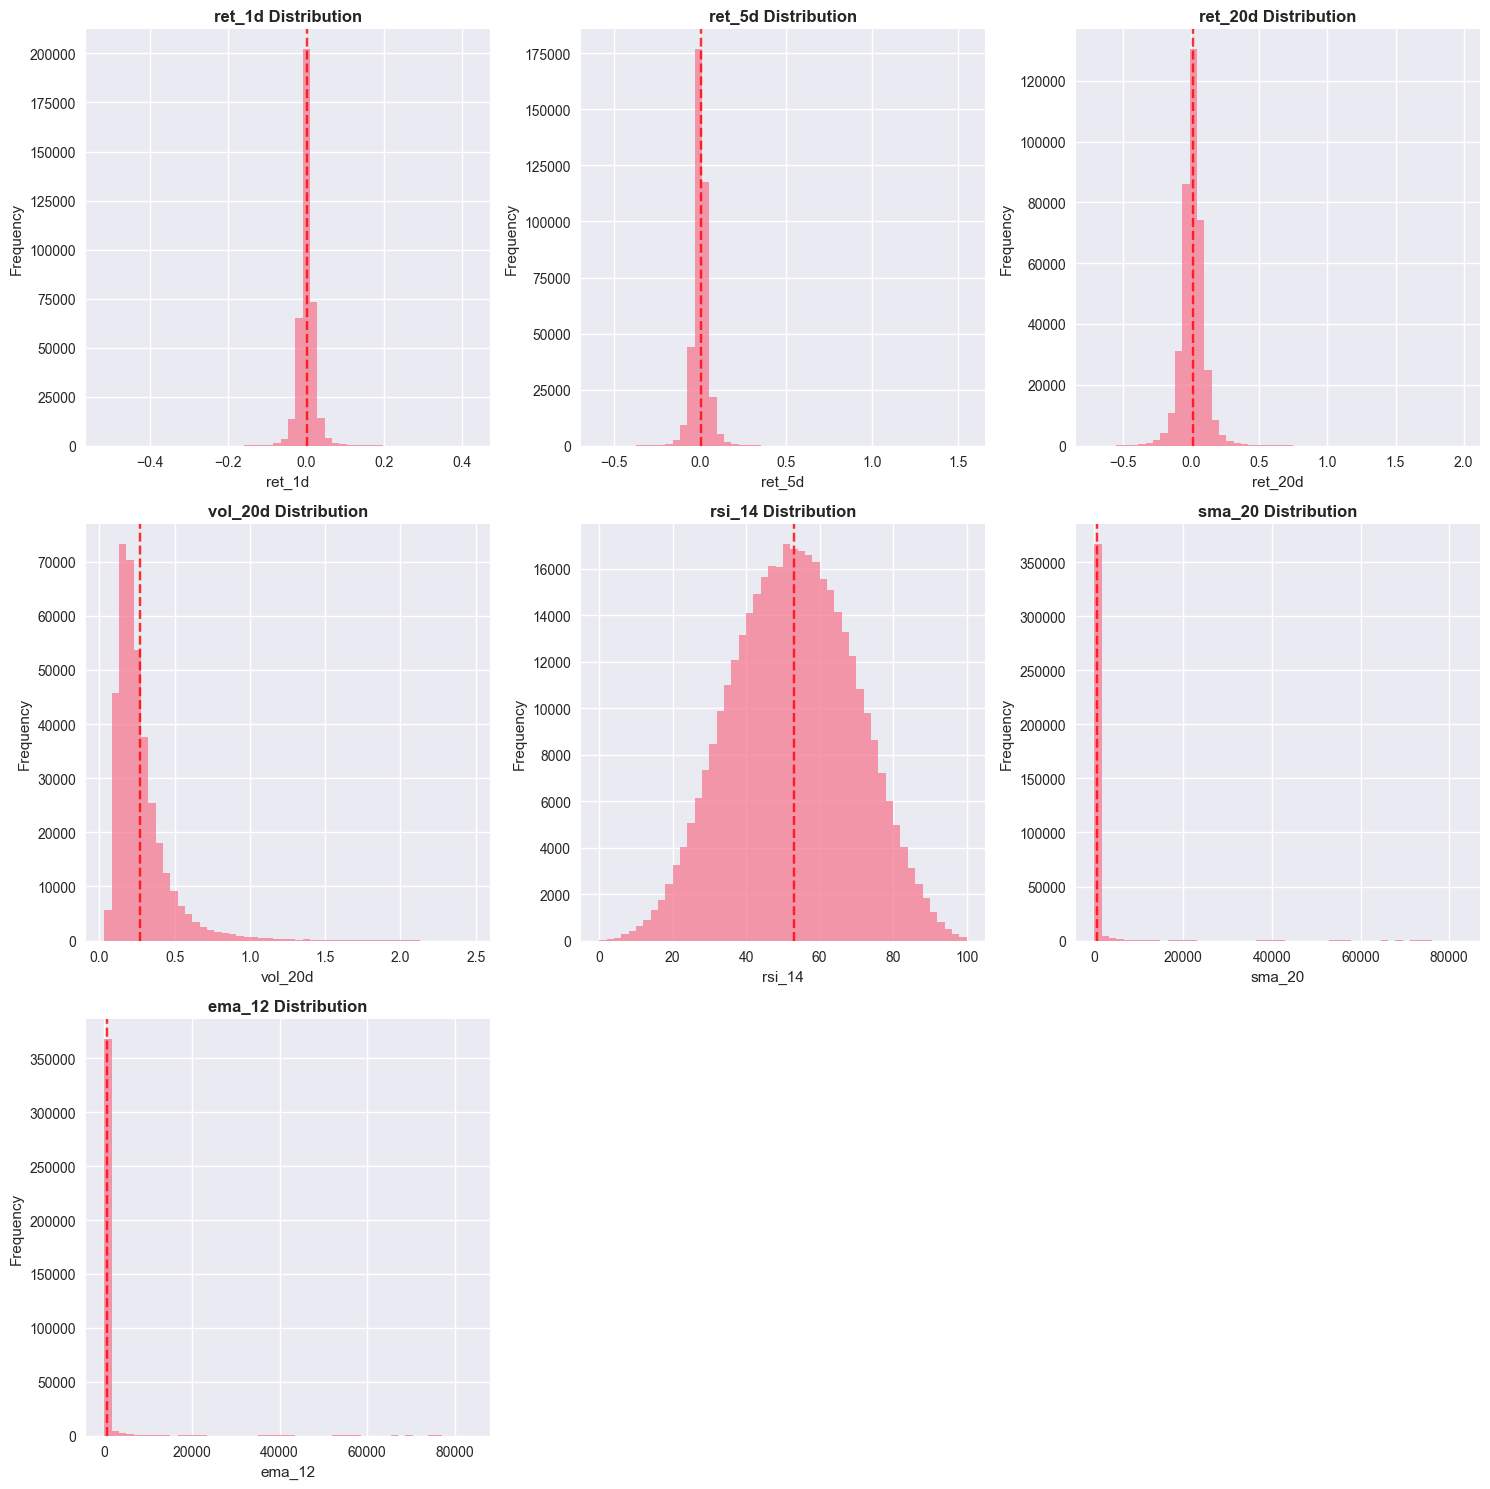

In [8]:
# Feature distributions visualization
# Select key features for distribution analysis
key_features = ['ret_1d', 'ret_5d', 'ret_20d', 'vol_20d', 'rsi_14', 'sma_20', 'ema_12', 'atr_14']
available_features = [f for f in key_features if f in df.columns]

if available_features:
    n_features = len(available_features)
    n_cols = 3
    n_rows = (n_features + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    axes = axes.flatten() if n_rows > 1 else [axes] if n_rows == 1 else axes
    
    for i, feature in enumerate(available_features):
        if i < len(axes):
            df[feature].hist(bins=50, ax=axes[i], alpha=0.7)
            axes[i].set_title(f'{feature} Distribution', fontweight='bold')
            axes[i].set_xlabel(feature)
            axes[i].set_ylabel('Frequency')
            axes[i].axvline(df[feature].mean(), color='red', linestyle='--', alpha=0.8)
    
    # Hide unused subplots
    for i in range(len(available_features), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Key features not found in dataset")

## 4. Correlation Analysis


🎯 Feature Correlation with Target (y_30d):

📊 Top 15 Features by Absolute Correlation:
                          Feature  Correlation  Abs Correlation
0   is_positive_growth_30d_future       1.0000           1.0000
1               growth_future_30d       0.6883           0.6883
2                          tnx10y      -0.0720           0.0720
3                            move      -0.0543           0.0543
4                             irx      -0.0315           0.0315
5                             vix       0.0274           0.0274
6                         vol_20d      -0.0193           0.0193
7                         vol_30d      -0.0184           0.0184
8                         vol_10d      -0.0180           0.0180
9                   volume_sma_20      -0.0172           0.0172
10                         vol_5d      -0.0145           0.0145
11                         sma_20      -0.0142           0.0142
12                         ret_5d      -0.0142           0.0142
13              

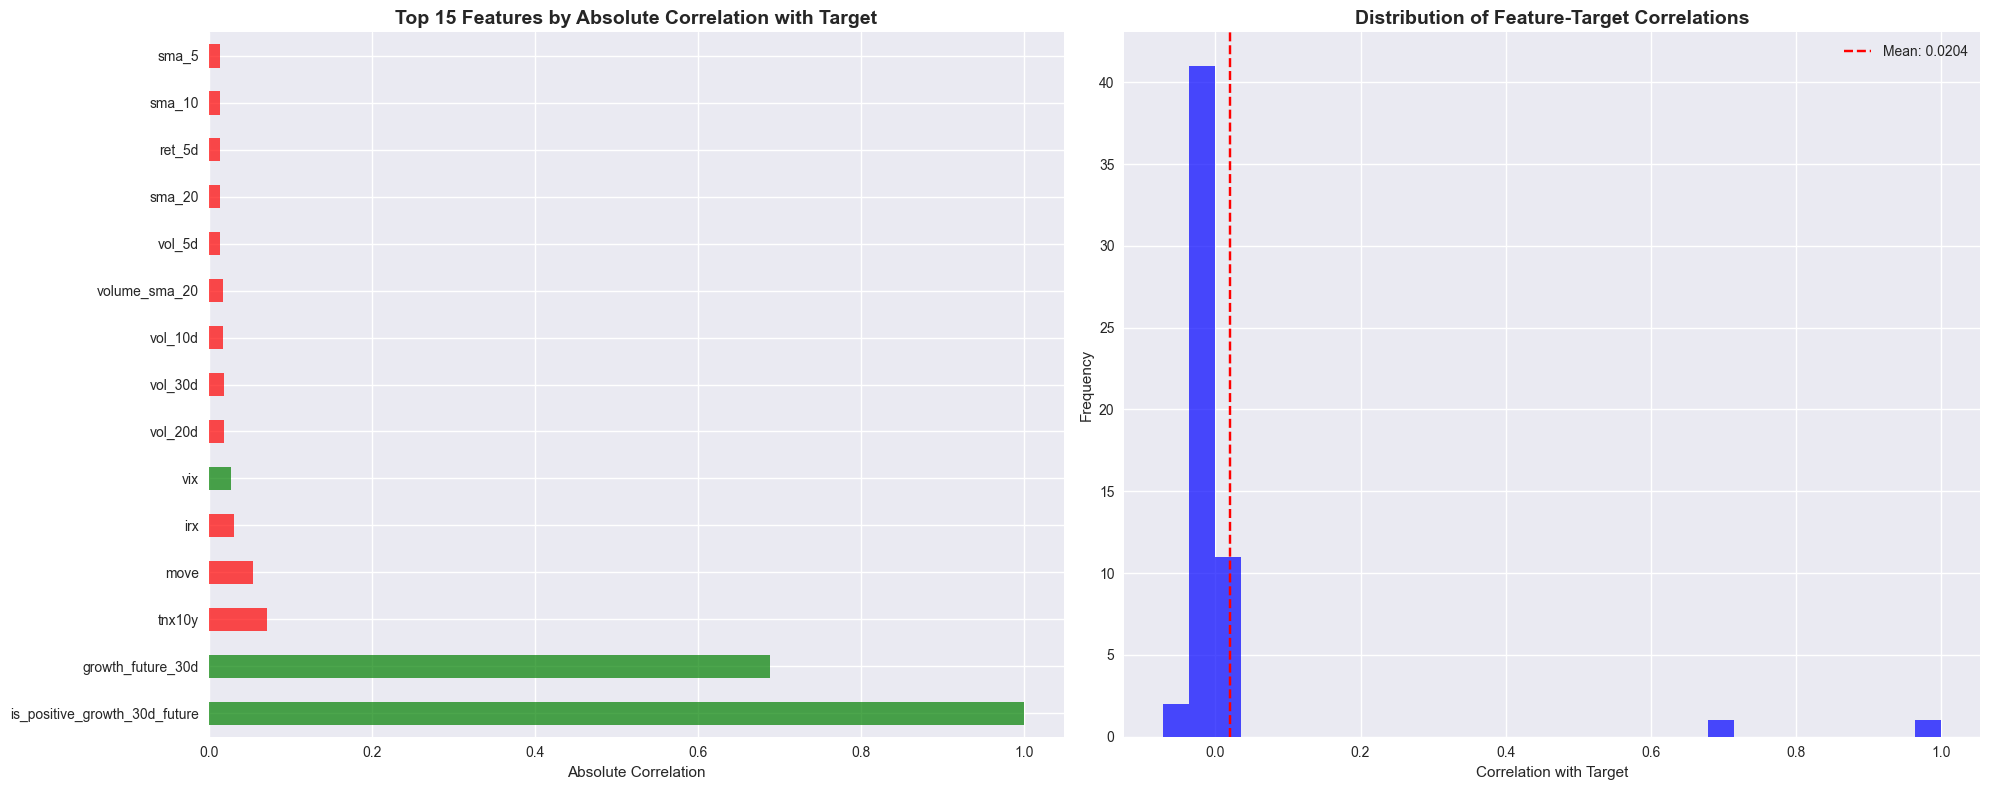

In [9]:
# Correlation with target variable
print("\n🎯 Feature Correlation with Target (y_30d):")

# Calculate correlations with target
target_correlations = df[feature_cols + ['y_30d']].corr()['y_30d'].drop('y_30d')
target_correlations_abs = target_correlations.abs().sort_values(ascending=False)

print("\n📊 Top 15 Features by Absolute Correlation:")
top_correlations = pd.DataFrame({
    'Feature': target_correlations_abs.head(15).index,
    'Correlation': target_correlations[target_correlations_abs.head(15).index].values,
    'Abs Correlation': target_correlations_abs.head(15).values
})
print(top_correlations.round(4))

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Top correlations bar plot
top_15_corr = target_correlations_abs.head(15)
colors = ['green' if target_correlations[feat] > 0 else 'red' for feat in top_15_corr.index]
top_15_corr.plot.barh(ax=ax1, color=colors, alpha=0.7)
ax1.set_title('Top 15 Features by Absolute Correlation with Target', fontweight='bold', fontsize=14)
ax1.set_xlabel('Absolute Correlation')

# Correlation distribution
target_correlations.hist(bins=30, ax=ax2, alpha=0.7, color='blue')
ax2.axvline(target_correlations.mean(), color='red', linestyle='--', 
           label=f'Mean: {target_correlations.mean():.4f}')
ax2.set_title('Distribution of Feature-Target Correlations', fontweight='bold', fontsize=14)
ax2.set_xlabel('Correlation with Target')
ax2.set_ylabel('Frequency')
ax2.legend()

plt.tight_layout()
plt.show()


🔥 Feature Intercorrelations (Top 20 features):


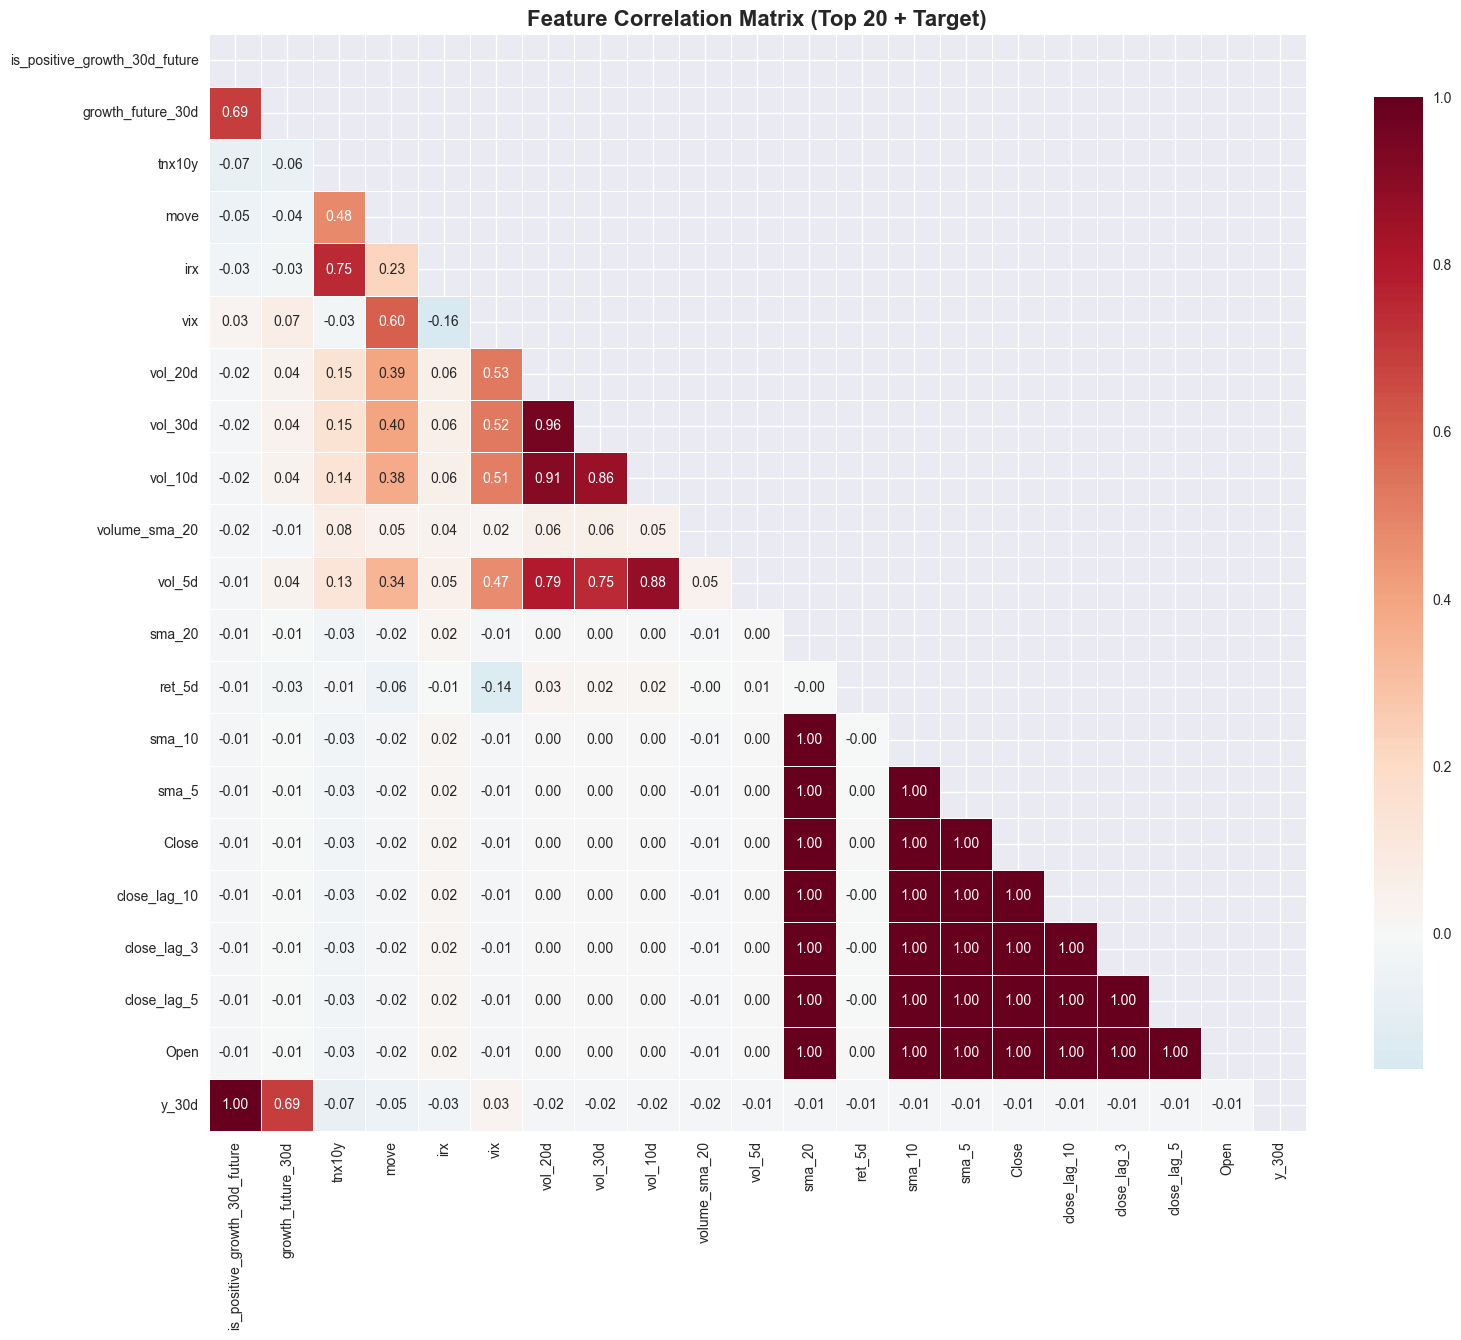


⚠️ Highly Correlated Feature Pairs (|r| > 0.8):
is_positive_growth_30d_future ↔ y_30d: 1.000
vol_20d ↔ vol_30d: 0.956
vol_20d ↔ vol_10d: 0.908
vol_30d ↔ vol_10d: 0.860
vol_10d ↔ vol_5d: 0.876
sma_20 ↔ sma_10: 1.000
sma_20 ↔ sma_5: 0.999
sma_20 ↔ Close: 0.999
sma_20 ↔ close_lag_10: 1.000
sma_20 ↔ close_lag_3: 0.999
sma_20 ↔ close_lag_5: 1.000
sma_20 ↔ Open: 0.999
sma_10 ↔ sma_5: 1.000
sma_10 ↔ Close: 1.000
sma_10 ↔ close_lag_10: 0.999
sma_10 ↔ close_lag_3: 1.000
sma_10 ↔ close_lag_5: 1.000
sma_10 ↔ Open: 1.000
sma_5 ↔ Close: 1.000
sma_5 ↔ close_lag_10: 0.999
sma_5 ↔ close_lag_3: 1.000
sma_5 ↔ close_lag_5: 1.000
sma_5 ↔ Open: 1.000
Close ↔ close_lag_10: 0.999
Close ↔ close_lag_3: 1.000
Close ↔ close_lag_5: 0.999
Close ↔ Open: 1.000
close_lag_10 ↔ close_lag_3: 0.999
close_lag_10 ↔ close_lag_5: 0.999
close_lag_10 ↔ Open: 0.999
close_lag_3 ↔ close_lag_5: 1.000
close_lag_3 ↔ Open: 1.000
close_lag_5 ↔ Open: 0.999


In [10]:
# Feature correlation heatmap (top features)
print("\n🔥 Feature Intercorrelations (Top 20 features):")

# Select top features by correlation with target
top_features = target_correlations_abs.head(20).index.tolist()
top_features_data = df[top_features + ['y_30d']]

# Correlation matrix
corr_matrix = top_features_data.corr()

# Heatmap
plt.figure(figsize=(16, 14))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='RdBu_r', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8}, fmt='.2f')
plt.title('Feature Correlation Matrix (Top 20 + Target)', fontweight='bold', fontsize=16)
plt.tight_layout()
plt.show()

# Identify highly correlated feature pairs
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.8:  # High correlation threshold
            high_corr_pairs.append((
                corr_matrix.columns[i], 
                corr_matrix.columns[j], 
                corr_matrix.iloc[i, j]
            ))

if high_corr_pairs:
    print("\n⚠️ Highly Correlated Feature Pairs (|r| > 0.8):")
    for feat1, feat2, corr in high_corr_pairs:
        print(f"{feat1} ↔ {feat2}: {corr:.3f}")
else:
    print("\n✅ No highly correlated feature pairs found (|r| > 0.8)")

## 5. Regional/Sector Analysis


🌍 Regional Analysis:
📊 Performance by Market:
           Avg_Return  Return_Std   Count  Up_Probability  Sharpe_Proxy
market                                                                 
US             0.0197      0.1105  180692          0.5925      0.178281
ASIA           0.0191      0.1253   60081          0.5623      0.152434
EU             0.0151      0.0941   53700          0.5780      0.160468
SECTOR         0.0115      0.0743   32085          0.6082      0.154778
REGIONAL       0.0114      0.0703   30746          0.6223      0.162162
COMMODITY      0.0055      0.0873   24404          0.5210      0.063001


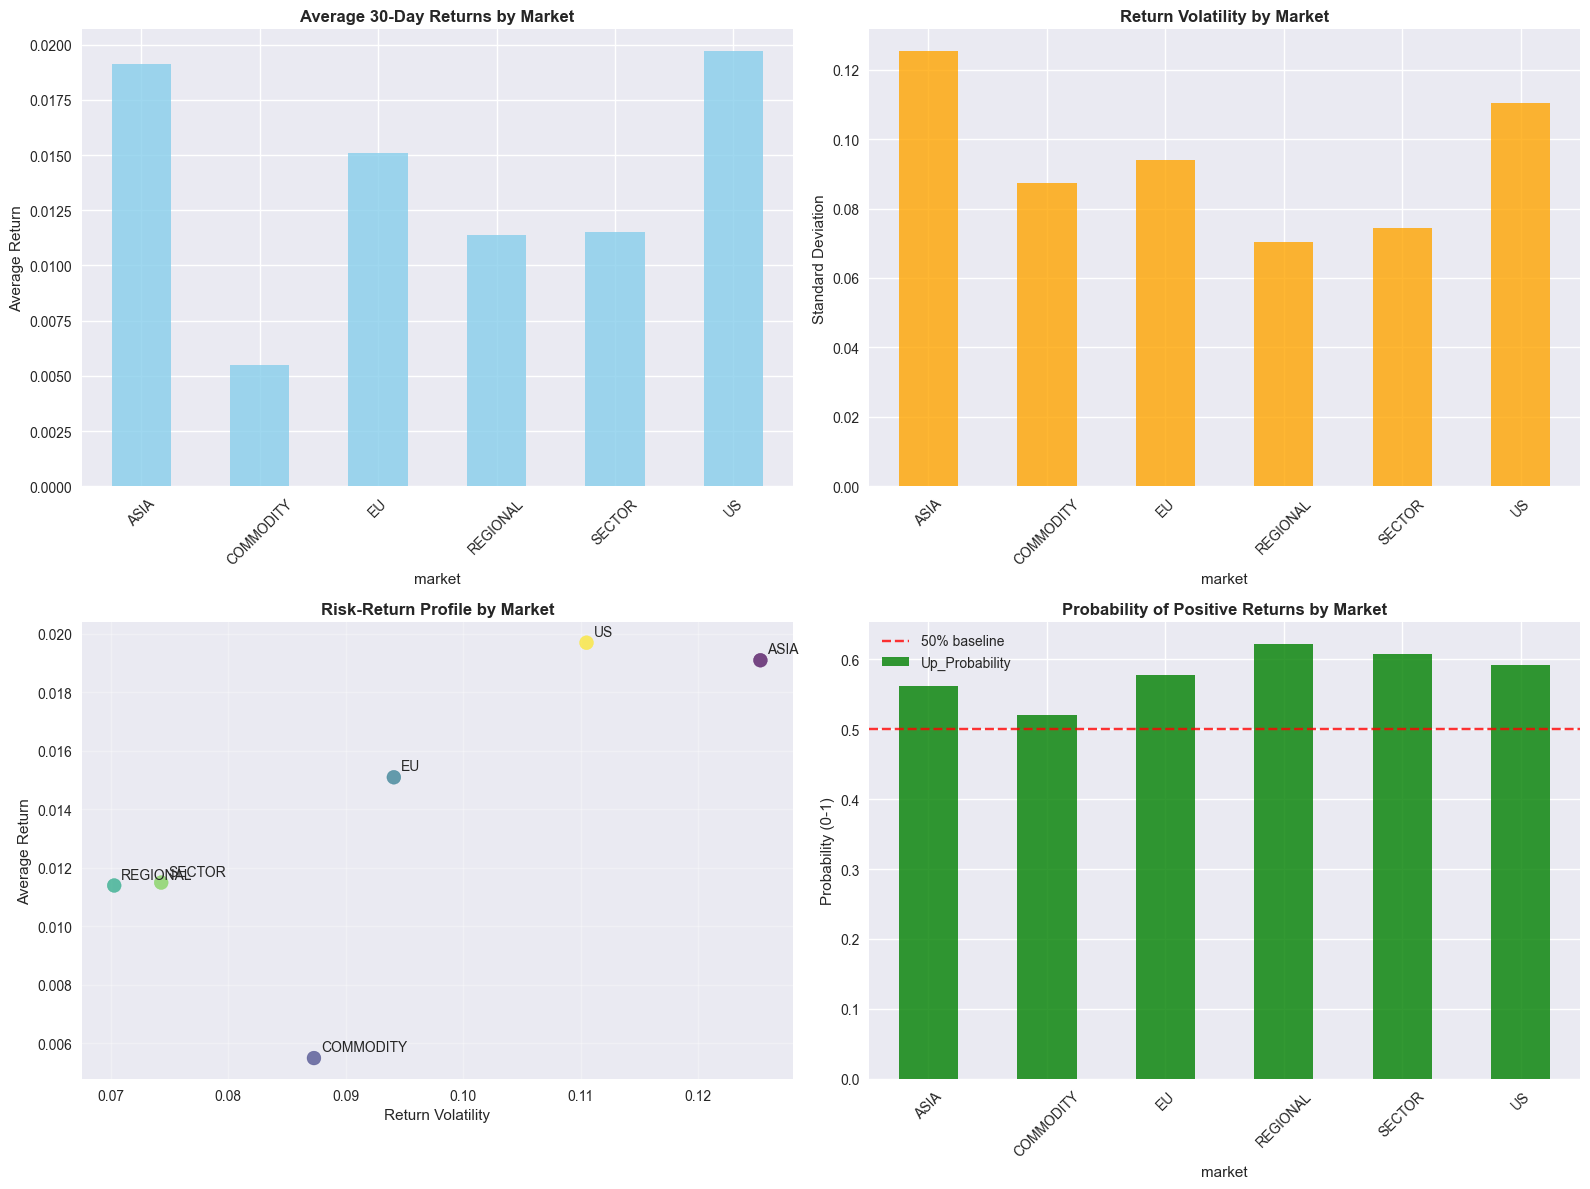

In [11]:
# Regional performance analysis
print("\n🌍 Regional Analysis:")

# Performance by market
market_performance = df.groupby('market').agg({
    'ret_30d': ['mean', 'std', 'count'],
    'y_30d': 'mean'
}).round(4)

market_performance.columns = ['Avg_Return', 'Return_Std', 'Count', 'Up_Probability']
market_performance['Sharpe_Proxy'] = market_performance['Avg_Return'] / market_performance['Return_Std']

print("📊 Performance by Market:")
print(market_performance.sort_values('Avg_Return', ascending=False))

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Average returns by market
market_performance['Avg_Return'].plot.bar(ax=axes[0,0], color='skyblue', alpha=0.8)
axes[0,0].set_title('Average 30-Day Returns by Market', fontweight='bold')
axes[0,0].set_ylabel('Average Return')
axes[0,0].tick_params(axis='x', rotation=45)

# Volatility by market
market_performance['Return_Std'].plot.bar(ax=axes[0,1], color='orange', alpha=0.8)
axes[0,1].set_title('Return Volatility by Market', fontweight='bold')
axes[0,1].set_ylabel('Standard Deviation')
axes[0,1].tick_params(axis='x', rotation=45)

# Risk-Return scatter
axes[1,0].scatter(market_performance['Return_Std'], market_performance['Avg_Return'], 
                 s=100, alpha=0.7, c=range(len(market_performance)), cmap='viridis')
for i, market in enumerate(market_performance.index):
    axes[1,0].annotate(market, 
                      (market_performance['Return_Std'].iloc[i], market_performance['Avg_Return'].iloc[i]),
                      xytext=(5, 5), textcoords='offset points', fontsize=10)
axes[1,0].set_xlabel('Return Volatility')
axes[1,0].set_ylabel('Average Return')
axes[1,0].set_title('Risk-Return Profile by Market', fontweight='bold')
axes[1,0].grid(True, alpha=0.3)

# Up probability by market
market_performance['Up_Probability'].plot.bar(ax=axes[1,1], color='green', alpha=0.8)
axes[1,1].set_title('Probability of Positive Returns by Market', fontweight='bold')
axes[1,1].set_ylabel('Probability (0-1)')
axes[1,1].tick_params(axis='x', rotation=45)
axes[1,1].axhline(y=0.5, color='red', linestyle='--', alpha=0.8, label='50% baseline')
axes[1,1].legend()

plt.tight_layout()
plt.show()


🏆 Top Performing Individual Tickers:

📈 Top 10 by Average Return (min 100 observations):
             Avg_Return  Return_Std  Up_Probability  Count
symbol                                                    
NVDA             0.0581      0.2177          0.6166   6416
NFLX             0.0557      0.1963          0.6236   5819
META             0.0386      0.1364          0.6455   3303
AAPL             0.0360      0.1316          0.6300   6416
MA               0.0356      0.0965          0.6873   4810
ADYEN.AS         0.0346      0.1794          0.5591   1812
AMZN             0.0306      0.1484          0.6103   6416
RELIANCE.BO      0.0303      0.1148          0.5920   6166
GOOGL            0.0299      0.1056          0.6152   5254
TCS.BO           0.0281      0.0912          0.6310   5128

📊 Top 10 by Sharpe Proxy:
        Avg_Return  Return_Std  Sharpe_Proxy  Count
symbol                                             
MA          0.0356      0.0965      0.368912   4810
V           0.0248 

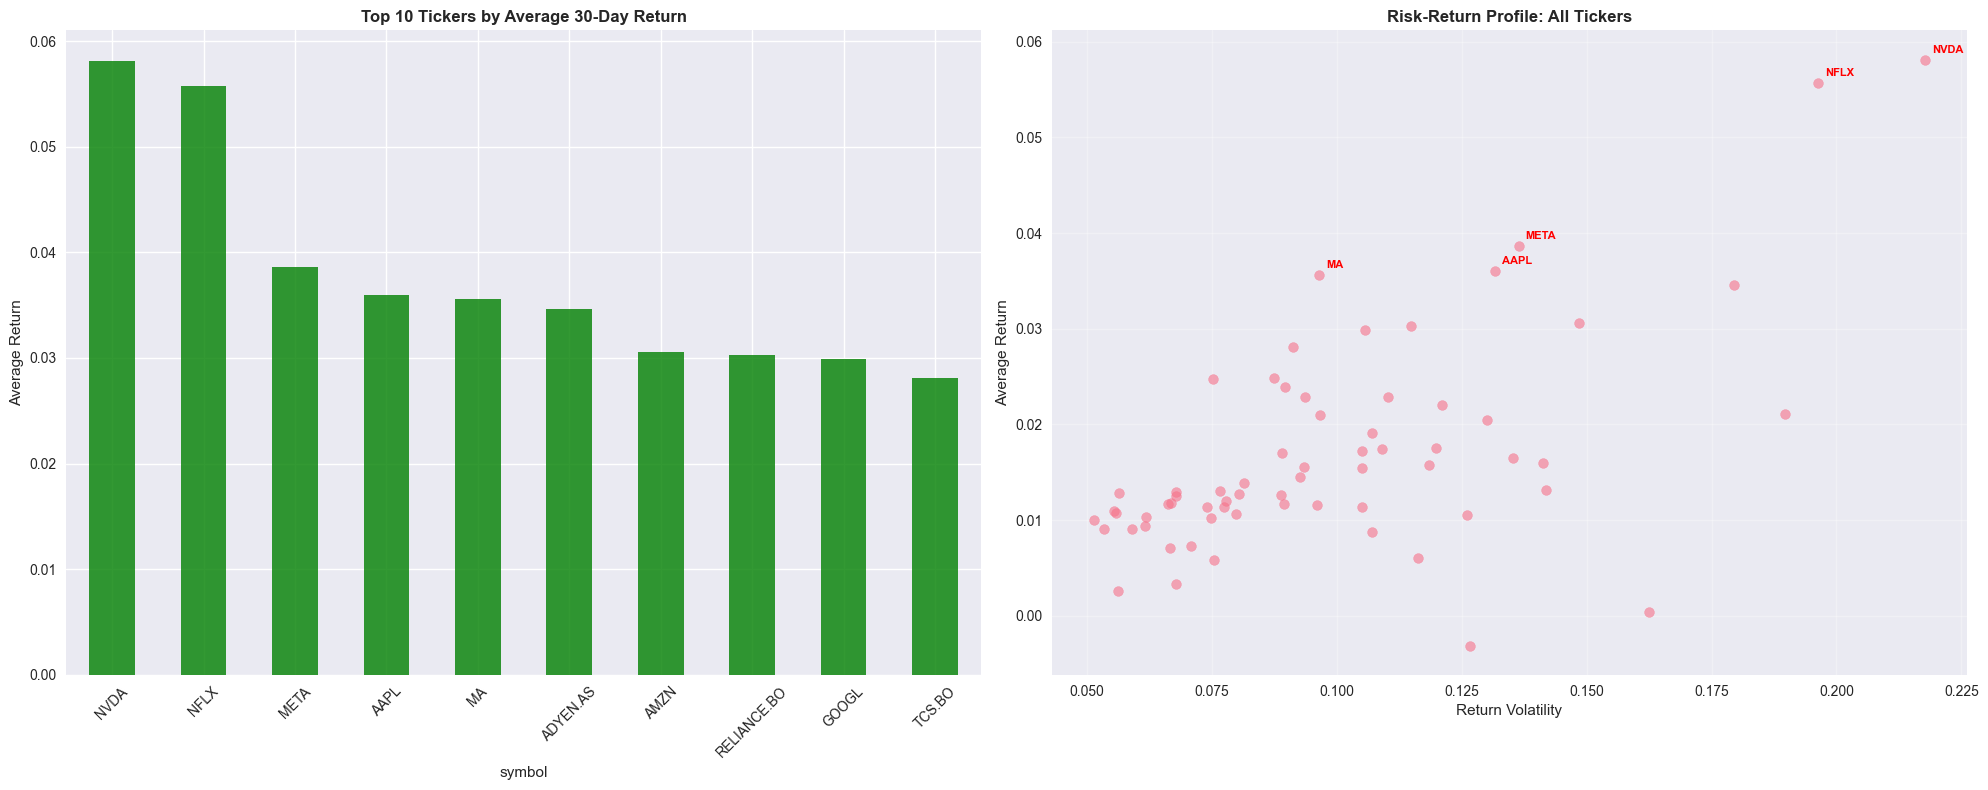

In [12]:
# Individual ticker analysis (top performers)
print("\n🏆 Top Performing Individual Tickers:")

ticker_performance = df.groupby('symbol').agg({
    'ret_30d': ['mean', 'std', 'count'],
    'y_30d': 'mean'
}).round(4)

ticker_performance.columns = ['Avg_Return', 'Return_Std', 'Count', 'Up_Probability']
ticker_performance['Sharpe_Proxy'] = ticker_performance['Avg_Return'] / ticker_performance['Return_Std']

# Filter tickers with sufficient data
min_observations = 100
ticker_performance_filtered = ticker_performance[ticker_performance['Count'] >= min_observations]

print(f"\n📈 Top 10 by Average Return (min {min_observations} observations):")
top_return = ticker_performance_filtered.sort_values('Avg_Return', ascending=False).head(10)
print(top_return[['Avg_Return', 'Return_Std', 'Up_Probability', 'Count']])

print(f"\n📊 Top 10 by Sharpe Proxy:")
top_sharpe = ticker_performance_filtered.sort_values('Sharpe_Proxy', ascending=False).head(10)
print(top_sharpe[['Avg_Return', 'Return_Std', 'Sharpe_Proxy', 'Count']])

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Top performers by return
top_return['Avg_Return'].plot.bar(ax=ax1, color='green', alpha=0.8)
ax1.set_title('Top 10 Tickers by Average 30-Day Return', fontweight='bold')
ax1.set_ylabel('Average Return')
ax1.tick_params(axis='x', rotation=45)

# Risk-return scatter for all tickers
ax2.scatter(ticker_performance_filtered['Return_Std'], ticker_performance_filtered['Avg_Return'], 
           alpha=0.6, s=50)
ax2.set_xlabel('Return Volatility')
ax2.set_ylabel('Average Return')
ax2.set_title('Risk-Return Profile: All Tickers', fontweight='bold')
ax2.grid(True, alpha=0.3)

# Highlight top performers
for ticker in top_return.head(5).index:
    x = ticker_performance_filtered.loc[ticker, 'Return_Std']
    y = ticker_performance_filtered.loc[ticker, 'Avg_Return']
    ax2.annotate(ticker, (x, y), xytext=(5, 5), textcoords='offset points', 
                fontsize=8, fontweight='bold', color='red')

plt.tight_layout()
plt.show()

## 6. Time Series Patterns

In [13]:
# Time-based analysis
print("\n📅 Time Series Patterns Analysis:")

# Convert date to datetime if not already
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['quarter'] = df['date'].dt.quarter
df['weekday'] = df['date'].dt.dayofweek

# Annual patterns
annual_performance = df.groupby('year').agg({
    'ret_30d': ['mean', 'std'],
    'y_30d': 'mean'
}).round(4)

annual_performance.columns = ['Avg_Return', 'Return_Std', 'Up_Probability']

print("\n📊 Recent Years Performance:")
print(annual_performance.tail(10))

# Monthly seasonality
monthly_performance = df.groupby('month').agg({
    'ret_30d': 'mean',
    'y_30d': 'mean'
}).round(4)
monthly_performance.columns = ['Avg_Return', 'Up_Probability']

print("\n📅 Monthly Seasonality:")
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_performance.index = month_names
print(monthly_performance)


📅 Time Series Patterns Analysis:

📊 Recent Years Performance:
      Avg_Return  Return_Std  Up_Probability
year                                        
2016      0.0289      0.0706          0.6616
2017      0.0345      0.0621          0.7228
2018      0.0024      0.0801          0.5057
2019      0.0299      0.0691          0.6839
2020      0.0290      0.1340          0.6360
2021      0.0208      0.0842          0.6014
2022     -0.0029      0.1134          0.4590
2023      0.0211      0.0909          0.5771
2024      0.0250      0.0893          0.6160
2025      0.0187      0.1185          0.5633

📅 Monthly Seasonality:
     Avg_Return  Up_Probability
Jan      0.0113          0.5498
Feb      0.0102          0.5776
Mar      0.0275          0.6208
Apr      0.0204          0.5764
May      0.0120          0.5544
Jun      0.0149          0.5940
Jul      0.0078          0.5410
Aug      0.0013          0.5471
Sep      0.0146          0.5869
Oct      0.0348          0.6480
Nov      0.0242      

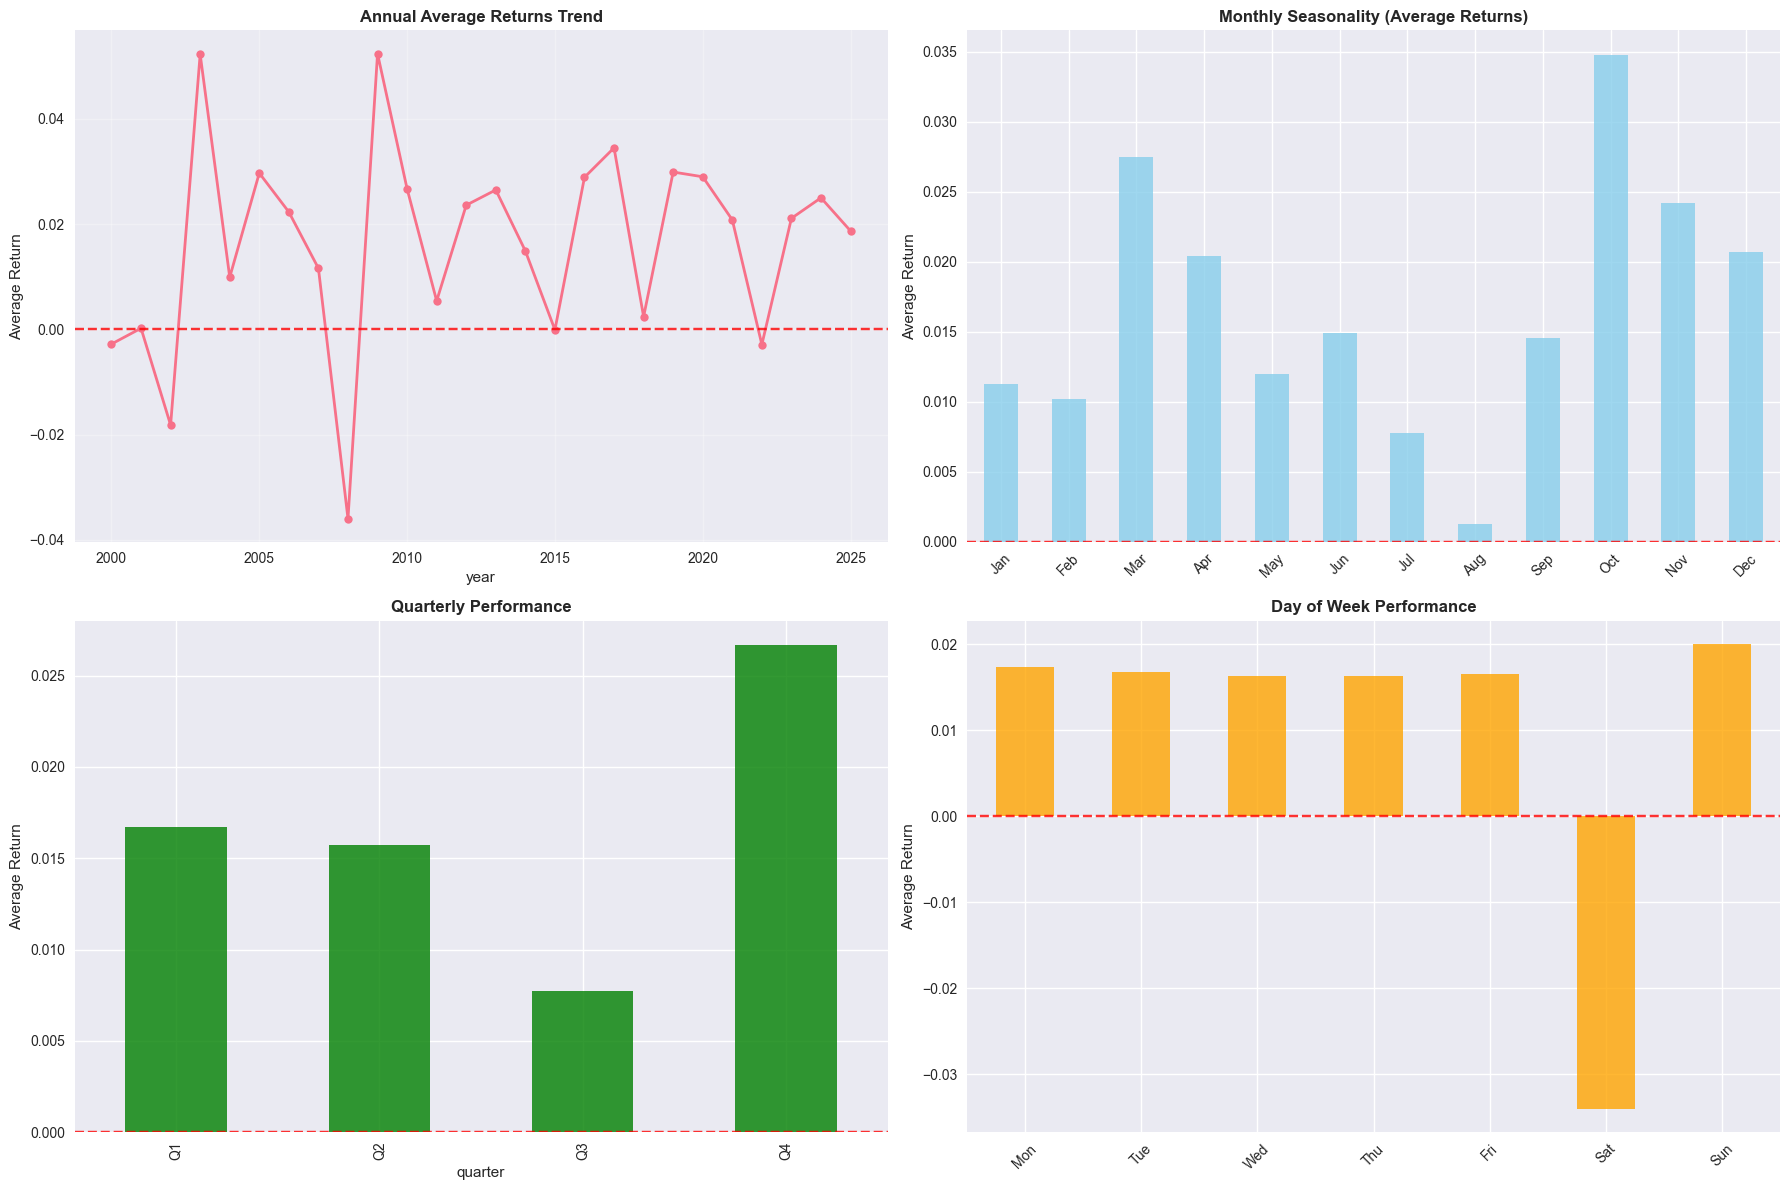

In [14]:
# Time series visualizations
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Annual performance trend
annual_performance['Avg_Return'].plot(ax=axes[0,0], marker='o', linewidth=2, markersize=6)
axes[0,0].set_title('Annual Average Returns Trend', fontweight='bold')
axes[0,0].set_ylabel('Average Return')
axes[0,0].grid(True, alpha=0.3)
axes[0,0].axhline(y=0, color='red', linestyle='--', alpha=0.8)

# Monthly seasonality
monthly_performance['Avg_Return'].plot.bar(ax=axes[0,1], color='skyblue', alpha=0.8)
axes[0,1].set_title('Monthly Seasonality (Average Returns)', fontweight='bold')
axes[0,1].set_ylabel('Average Return')
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].axhline(y=0, color='red', linestyle='--', alpha=0.8)

# Quarterly patterns
quarterly_performance = df.groupby('quarter')['ret_30d'].mean()
quarterly_performance.plot.bar(ax=axes[1,0], color='green', alpha=0.8)
axes[1,0].set_title('Quarterly Performance', fontweight='bold')
axes[1,0].set_ylabel('Average Return')
axes[1,0].set_xticks([0, 1, 2, 3])
axes[1,0].set_xticklabels(['Q1', 'Q2', 'Q3', 'Q4'])
axes[1,0].axhline(y=0, color='red', linestyle='--', alpha=0.8)

# Weekday patterns
weekday_performance = df.groupby('weekday')['ret_30d'].mean()
weekday_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
weekday_performance.index = weekday_names
weekday_performance.plot.bar(ax=axes[1,1], color='orange', alpha=0.8)
axes[1,1].set_title('Day of Week Performance', fontweight='bold')
axes[1,1].set_ylabel('Average Return')
axes[1,1].tick_params(axis='x', rotation=45)
axes[1,1].axhline(y=0, color='red', linestyle='--', alpha=0.8)

plt.tight_layout()
plt.show()

## 7. Macro Environment Analysis


🌐 Macro Environment Analysis:
Available macro indicators: ['vix', 'tnx10y', 'dxy', 'move', 'irx', 'gspc', 'ndx', 'rut']

📊 Macro Indicators Statistics:
               vix       tnx10y          dxy         move          irx  \
count  381708.0000  381708.0000  381708.0000  381708.0000  381708.0000   
mean       19.7774       3.2134      21.8103      89.9663       1.7891   
std         8.4470       1.2791       2.3210      31.1476       1.9173   
min         9.1400       0.4990      18.0821      36.6200      -0.1050   
25%        13.8500       2.1690      20.5530      64.3700       0.0900   
50%        17.6900       3.1570      21.2510      85.1000       1.0730   
75%        23.1300       4.2450      22.4495     115.1700       3.4050   
max        82.6900       6.7810      29.8500     264.6000       6.2200   

              gspc          ndx          rut  
count  381708.0000  381708.0000  381708.0000  
mean     2267.9245    5878.7382    1132.8691  
std      1363.0480    5510.7062     569

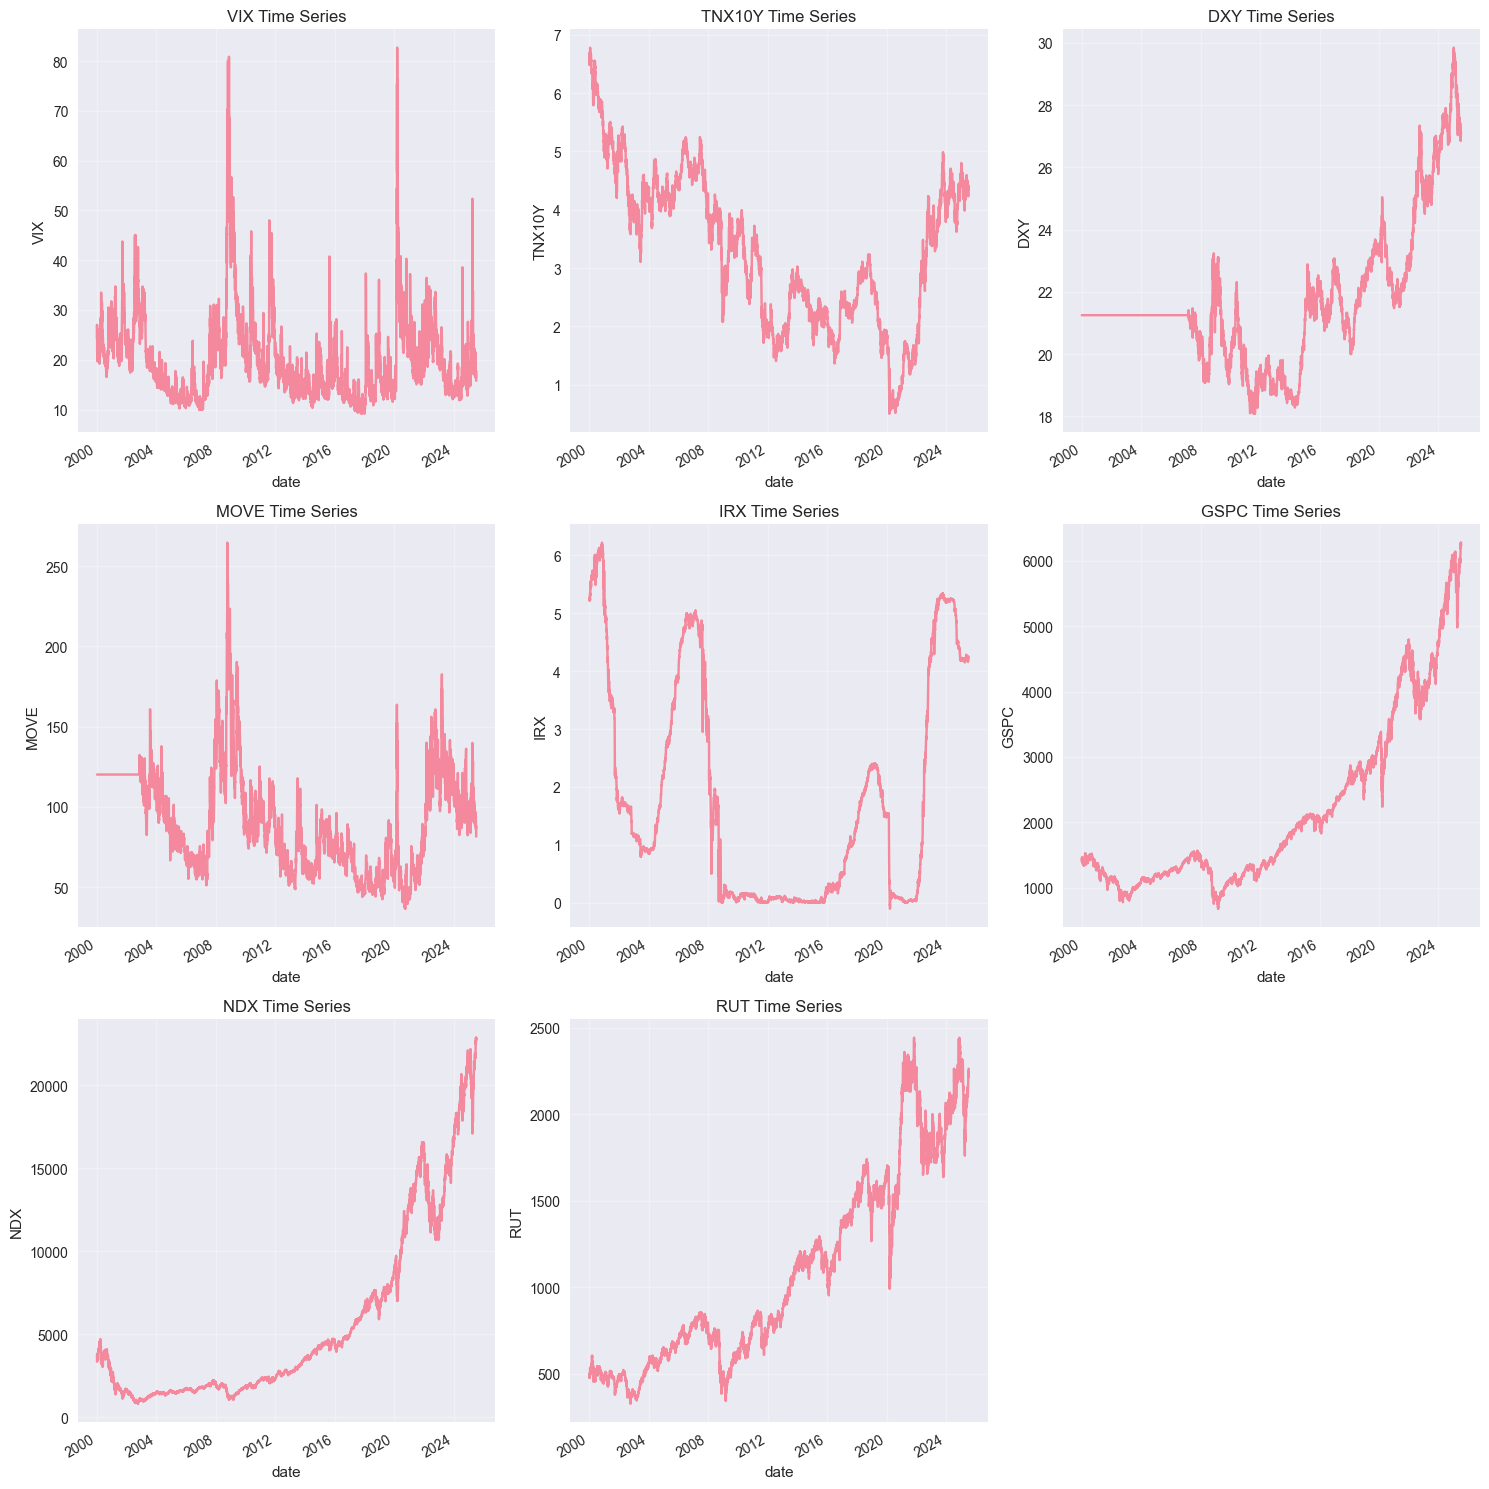

In [15]:
# Macro indicators analysis
print("\n🌐 Macro Environment Analysis:")

# Available macro indicators in dataset
available_macro = [col for col in MACRO_INDICATORS.keys() if col in df.columns]
print(f"Available macro indicators: {available_macro}")

if available_macro:
    # Macro statistics
    macro_stats = df[available_macro].describe().round(4)
    print("\n📊 Macro Indicators Statistics:")
    print(macro_stats)
    
    # Correlation with returns
    macro_target_corr = df[available_macro + ['ret_30d']].corr()['ret_30d'].drop('ret_30d')
    print("\n🎯 Macro Indicators Correlation with Returns:")
    print(macro_target_corr.sort_values(key=abs, ascending=False).round(4))
    
    # Visualization
    if len(available_macro) >= 2:
        n_macro = len(available_macro)
        n_cols = min(3, n_macro)
        n_rows = (n_macro + n_cols - 1) // n_cols
        
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
        axes = axes.flatten() if n_rows > 1 else [axes] if n_rows == 1 else axes
        
        for i, macro in enumerate(available_macro):
            if i < len(axes):
                # Time series of macro indicator
                macro_ts = df.groupby('date')[macro].first().dropna()
                macro_ts.plot(ax=axes[i], title=f'{macro.upper()} Time Series', alpha=0.8)
                axes[i].set_ylabel(macro.upper())
                axes[i].grid(True, alpha=0.3)
        
        # Hide unused subplots
        for i in range(len(available_macro), len(axes)):
            axes[i].set_visible(False)
        
        plt.tight_layout()
        plt.show()
else:
    print("⚠️ No macro indicators found in dataset")

## 8. Key Insights and Summary

In [16]:
# Summary statistics
print("\n📋 EDA Summary Report")
print("=" * 50)

print(f"\n📊 Dataset Overview:")
print(f"• Total observations: {len(df):,}")
print(f"• Unique symbols: {df['symbol'].nunique()}")
print(f"• Date range: {df['date'].min().strftime('%Y-%m-%d')} to {df['date'].max().strftime('%Y-%m-%d')}")
print(f"• Features: {len(feature_cols)} total")

print(f"\n🎯 Target Variable:")
print(f"• Class balance: {target_pct[1]:.1f}% Up, {target_pct[0]:.1f}% Down")
print(f"• Average 30-day return: {df['ret_30d'].mean():.4f} ({df['ret_30d'].mean()*100:.2f}%)")
print(f"• Return volatility: {df['ret_30d'].std():.4f} ({df['ret_30d'].std()*100:.2f}%)")

print(f"\n🔧 Feature Quality:")
missing_rate = (df[feature_cols].isnull().sum().sum() / (len(df) * len(feature_cols))) * 100
print(f"• Overall missing data rate: {missing_rate:.2f}%")
print(f"• Features with high correlation to target (|r|>0.1): {(target_correlations_abs > 0.1).sum()}")
print(f"• Highly correlated feature pairs (|r|>0.8): {len(high_corr_pairs)}")

print(f"\n🌍 Market Analysis:")
best_market = market_performance['Avg_Return'].idxmax()
worst_market = market_performance['Avg_Return'].idxmin()
print(f"• Best performing market: {best_market} ({market_performance.loc[best_market, 'Avg_Return']:.4f})")
print(f"• Worst performing market: {worst_market} ({market_performance.loc[worst_market, 'Avg_Return']:.4f})")

if len(available_macro) > 0:
    print(f"\n🌐 Macro Environment:")
    strongest_macro_corr = macro_target_corr.abs().idxmax()
    print(f"• Strongest macro predictor: {strongest_macro_corr} (r={macro_target_corr[strongest_macro_corr]:.4f})")

print(f"\n📅 Temporal Patterns:")
best_month = monthly_performance['Avg_Return'].idxmax()
worst_month = monthly_performance['Avg_Return'].idxmin()
print(f"• Best month: {best_month} ({monthly_performance.loc[best_month, 'Avg_Return']:.4f})")
print(f"• Worst month: {worst_month} ({monthly_performance.loc[worst_month, 'Avg_Return']:.4f})")

print("\n" + "=" * 50)
print("✅ EDA Complete - Ready for Modeling!")


📋 EDA Summary Report

📊 Dataset Overview:
• Total observations: 381,708
• Unique symbols: 65
• Date range: 2000-01-03 to 2025-07-10
• Features: 57 total

🎯 Target Variable:
• Class balance: 58.5% Up, 41.5% Down
• Average 30-day return: 0.0167 (1.67%)
• Return volatility: 0.1042 (10.42%)

🔧 Feature Quality:
• Overall missing data rate: 1.75%
• Features with high correlation to target (|r|>0.1): 2
• Highly correlated feature pairs (|r|>0.8): 33

🌍 Market Analysis:
• Best performing market: US (0.0197)
• Worst performing market: COMMODITY (0.0055)

🌐 Macro Environment:
• Strongest macro predictor: vix (r=0.0709)

📅 Temporal Patterns:
• Best month: Oct (0.0348)
• Worst month: Aug (0.0013)

✅ EDA Complete - Ready for Modeling!


In [17]:
# Save key insights for later use
eda_insights = {
    'dataset_shape': df.shape,
    'date_range': (df['date'].min(), df['date'].max()),
    'target_balance': dict(target_pct),
    'top_features_by_correlation': top_correlations.head(10).to_dict('records'),
    'market_performance': market_performance.to_dict('index'),
    'monthly_seasonality': monthly_performance.to_dict('index'),
    'missing_data_rate': missing_rate,
    'highly_correlated_pairs': high_corr_pairs
}

# Save to reports directory
import json
insights_file = REPORTS_DIR / "eda_insights.json"
with open(insights_file, 'w') as f:
    json.dump(eda_insights, f, indent=2, default=str)

print(f"\n💾 EDA insights saved to: {insights_file}")
print("\n🎉 Exploratory Data Analysis Complete!")


💾 EDA insights saved to: c:\Users\Gleb\work\courses\2025-05-30_stocks-analytics-course\project\notebooks\..\data\reports\eda_insights.json

🎉 Exploratory Data Analysis Complete!
